In [5]:
from notebook_tools import *
%matplotlib inline

# ppp-SRC candidates

In [3]:
A=12
variables = ['A'
             ,'Xb'   ,'Pmiss.P()'    ,'Pmiss.Pt()'   ,'theta_pq'     ,'p_over_q' , 'Pcm.Mag()' 
             ,'pEdep[0]', 'protons[0].P()', 'pEdep[1]', 'protons[1].P()', 'pEdep[2]', 'protons[2].P()'
             ,'TMath::RadToDeg()*protons[0].Theta()',  'TMath::RadToDeg()*protons[1].Theta()',  'TMath::RadToDeg()*protons[2].Theta()' 
             ,'alpha[0]','alpha[1]','alpha[2]','alpha_q'
            ]
ana_all = TAnalysisEG2("SRCPmissXb_NoCTofDATA_%s"% dm.Target(A))
all_events = tree2array( ana_all.GetTree() , branches=variables , selection=None )
ana_all3p = TAnalysisEG2("SRCPmissXb_NoCTofDATA_%s"% dm.Target(A) , ROOT.TCut("Np>=3"))
all_ppp = tree2array( ana_all3p.GetTree() , branches=variables , selection='Np>=3' )
ana_ppp = TAnalysisEG2("pppSRCCut_NoCTofDATA_%s"% dm.Target(A) )
ppp_src = tree2array( ana_ppp.GetTree() , branches=variables )

ana_ppp_c12 = TAnalysisEG2("pppSRCCut_NoCTofDATA_C12")
ppp_src_c12 = tree2array( ana_ppp_c12.GetTree() , branches=variables )

ana_ppp_al27 = TAnalysisEG2("pppSRCCut_NoCTofDATA_Al27")
ppp_src_al27 = tree2array( ana_ppp_al27.GetTree() , branches=variables )

ana_ppp_fe56 = TAnalysisEG2("pppSRCCut_NoCTofDATA_Fe56")
ppp_src_fe56 = tree2array( ana_ppp_fe56.GetTree() , branches=variables )

ana_ppp_pb208 = TAnalysisEG2("pppSRCCut_NoCTofDATA_Pb208")
ppp_src_pb208 = tree2array( ana_ppp_pb208.GetTree() , branches=variables )

ana_ppp_alltargets = TAnalysisEG2("pppSRCCut_NoCTofDATA_C12_Al27_Fe56_Pb208" )
ppp_src_alltargets = tree2array( ana_ppp_alltargets.GetTree() , branches=variables )

# now, we add the 2-protons + ? sample
# (e,e'pp?)

In [4]:
ana_ppnothing_DIS = TAnalysisEG2("ppnothing_alpha12_vs_XbCutDIS_New_NoCTofDATA_%s"% dm.Target(A) )
ppnothing_DIS = tree2array( ana_ppnothing_DIS.GetTree() , branches=variables )
ana_ppnothing_Correlation = TAnalysisEG2("ppnothing_alpha12_vs_XbCutCorrelation_New_NoCTofDATA_%s"% dm.Target(A) )
ppnothing_Correlation = tree2array( ana_ppnothing_Correlation.GetTree() , branches=variables )

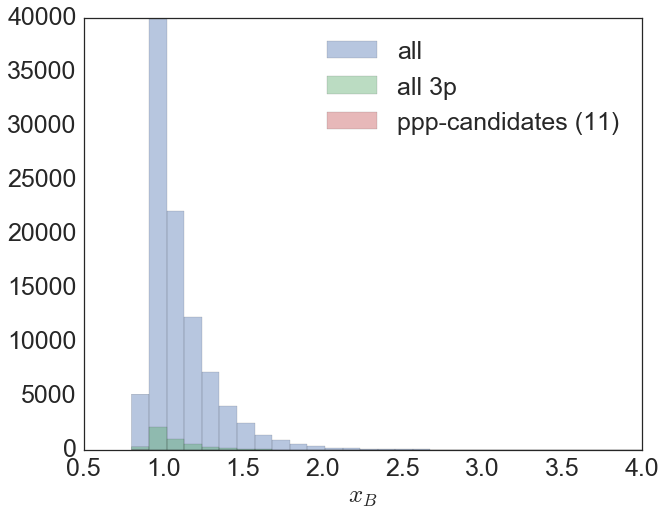

In [4]:
plot_hist1d_ppp( 'Xb', 0.8 , 4 , 30 , '$x_B$' )

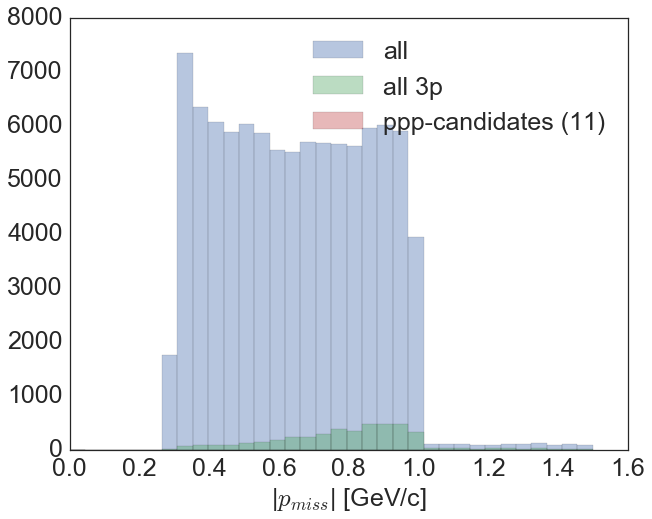

In [5]:
plot_hist1d_ppp( 'Pmiss.P()', 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' );

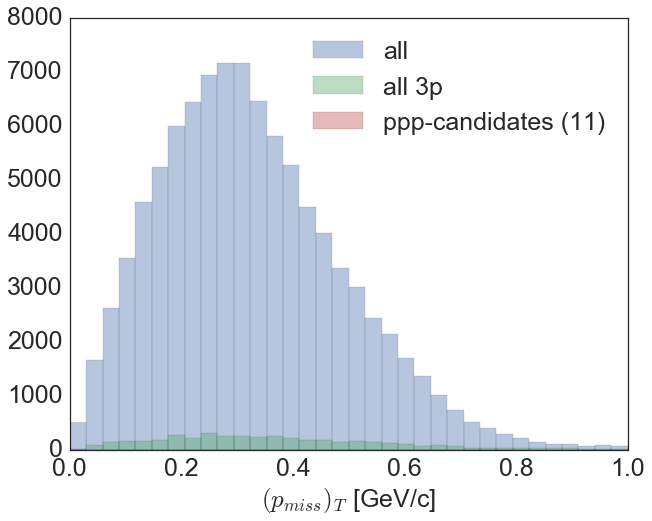

In [6]:
plot_hist1d_ppp( 'Pmiss.Pt()', 0 , 1 , 35 , '$(p_{miss})_T$ [GeV/c]' )

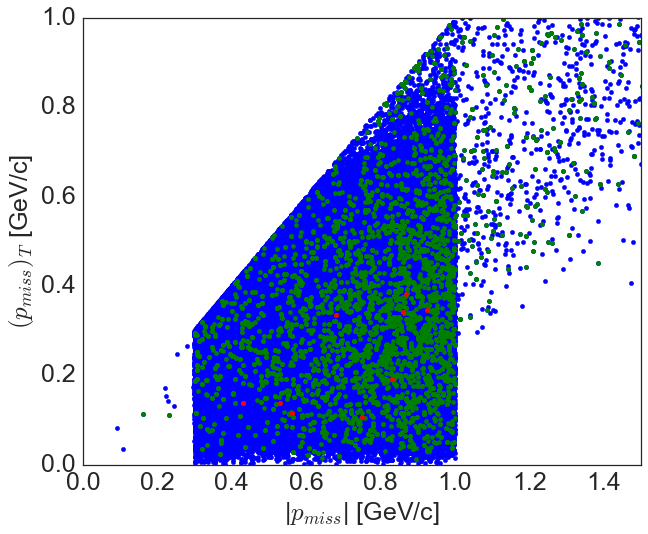

In [41]:
plot_hist2d_ppp( 'Pmiss.P()' , 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' , 'Pmiss.Pt()', 0 , 1 , 35 , '$(p_{miss})_T$ [GeV/c]' )

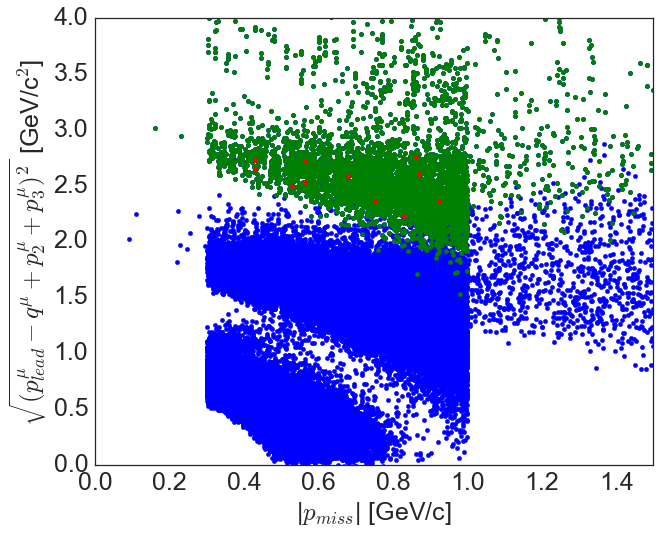

In [46]:
plot_hist2d_ppp( 'Pmiss.P()' , 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' , 'Pcm.Mag()', 0 , 4 , 35 , '$\\sqrt{(p^{\mu}_{lead}-q^{\mu}+p^{\mu}_2+p^{\mu}_3)^{2}}$ [GeV/c$^{2}$]' )

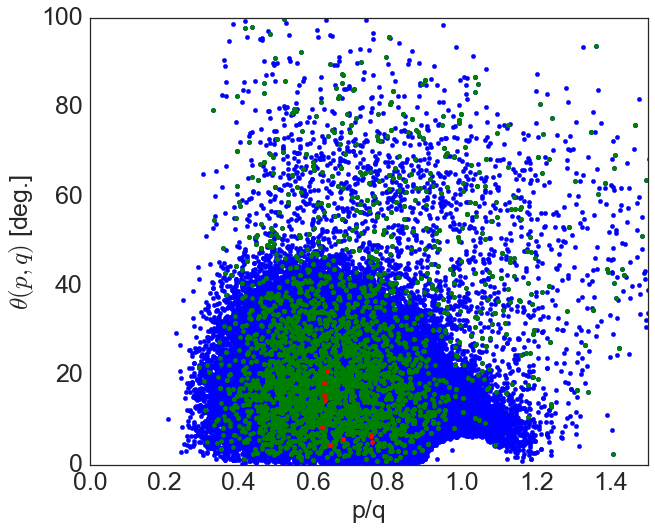

In [50]:
plot_hist2d_ppp( 'p_over_q' , 0 , 1.5 , 35 , 'p/q' , 'theta_pq', 0 , 100 , 100 , '$\\theta(p,q)$ [deg.]' )

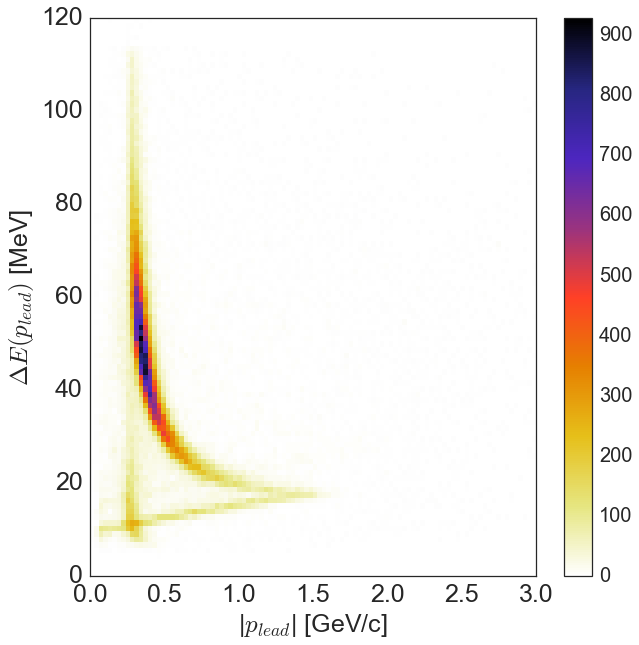

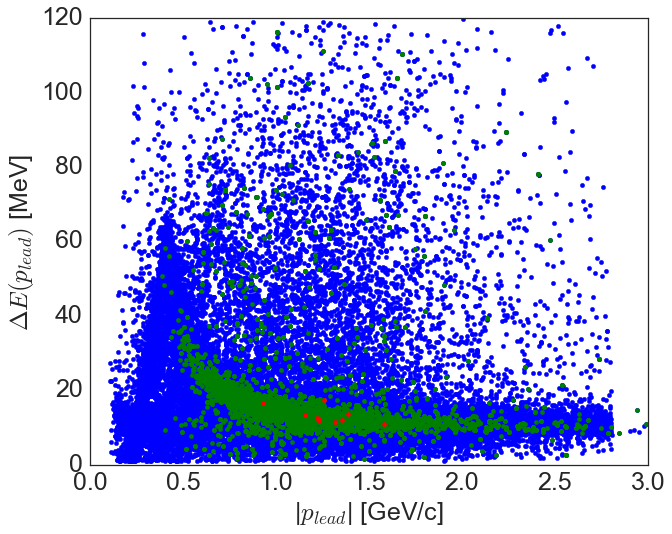

In [109]:
plot_col2d( 'protons.P()' , 0 , 3 , 100 , '|$p_{lead}$| [GeV/c]' , 'pEdep', 0 , 120 , 100 , '$\\Delta E(p_{lead})$ [MeV]' )
plot_hist2d_ppp( 'protons[0].P()' , 0 , 3 , 100 , '|$p_{lead}$| [GeV/c]' , 'pEdep[0]', 0 , 120 , 100 , '$\\Delta E(p_{lead})$ [MeV]' )

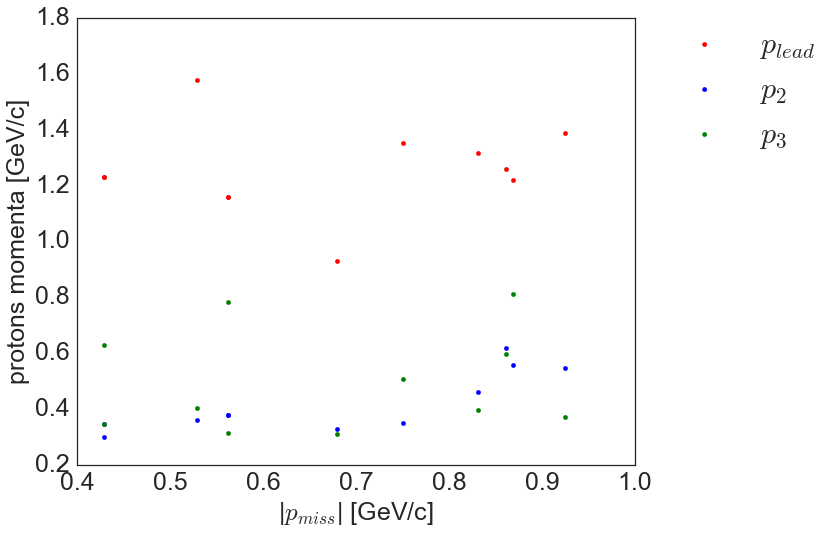

In [12]:
# p1/p2 vs. p(miss) - to show a typical event 
fig = plt.figure(figsize = [10,8])
ax = plt.subplot(111)
plt.scatter(ppp_src['Pmiss.P()'], ppp_src['protons[0].P()'] , color='red' , label='$p_{lead}$')
plt.scatter(ppp_src['Pmiss.P()'], ppp_src['protons[1].P()'] , color='blue' , label='$p_2$')
plt.scatter(ppp_src['Pmiss.P()'], ppp_src['protons[2].P()'] , color='green', label='$p_3$')
ax.set_xlabel('|$p_{miss}$| [GeV/c]',fontsize=25)
ax.set_ylabel('protons momenta [GeV/c]',fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig( dirname + "/ppp_p2p3_vs_pmiss.pdf" )

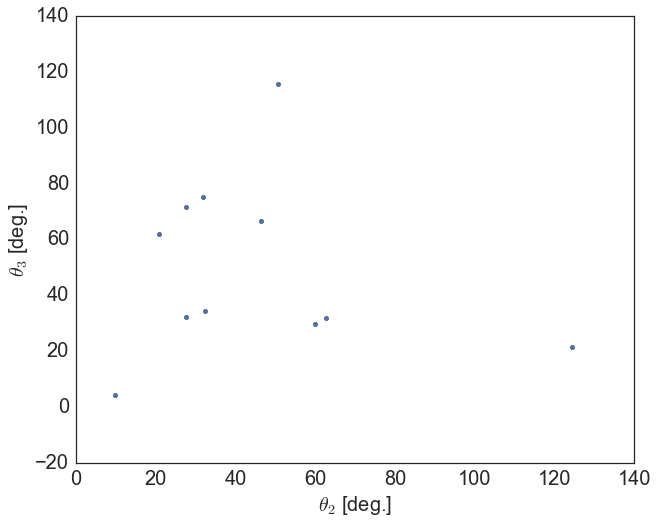

In [4]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src['TMath::RadToDeg()*protons[1].Theta()'],ppp_src['TMath::RadToDeg()*protons[2].Theta()'] ) # , 0 , 180 ,100 ,  '$\\theta_2$ [deg.]' , 
pt.set_axes(ax , '$\\theta_2$ [deg.]' , '$\\theta_3$ [deg.]')

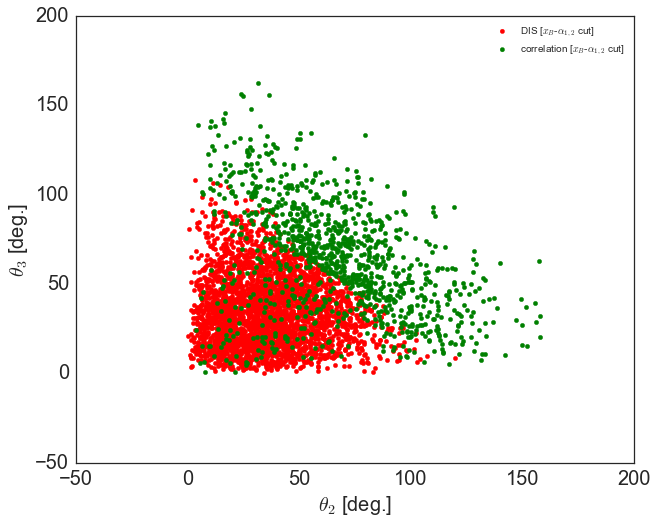

In [10]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppnothing_DIS['TMath::RadToDeg()*protons[0].Theta()'],
            ppnothing_DIS['TMath::RadToDeg()*protons[1].Theta()'] ,
           label = 'DIS [$x_B$-$\\alpha_{1,2}$ cut]',
           color = 'red')  
plt.scatter( ppnothing_Correlation['TMath::RadToDeg()*protons[0].Theta()'],
            ppnothing_Correlation['TMath::RadToDeg()*protons[1].Theta()'] ,
           label = 'correlation [$x_B$-$\\alpha_{1,2}$ cut]',
           color = 'green')  
pt.set_axes(ax , '$\\theta_2$ [deg.]' , '$\\theta_3$ [deg.]')
plt.legend()

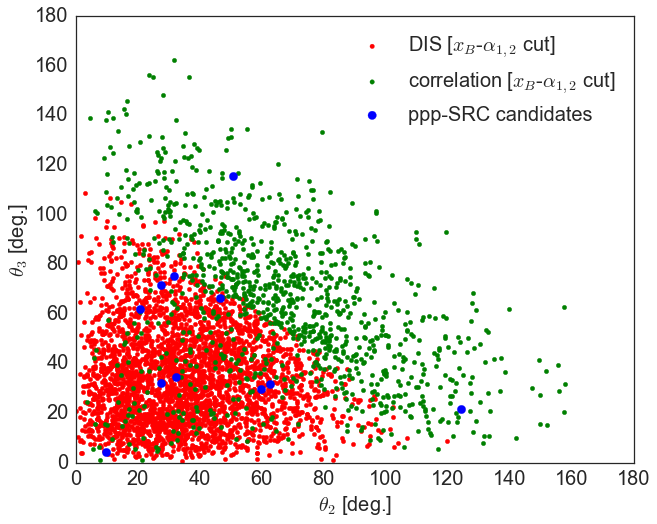

In [5]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppnothing_DIS['TMath::RadToDeg()*protons[0].Theta()'],
            ppnothing_DIS['TMath::RadToDeg()*protons[1].Theta()'] ,
           label = 'DIS [$x_B$-$\\alpha_{1,2}$ cut]',
           color = 'red')  
plt.scatter( ppnothing_Correlation['TMath::RadToDeg()*protons[0].Theta()'],
            ppnothing_Correlation['TMath::RadToDeg()*protons[1].Theta()'] ,
           label = 'correlation [$x_B$-$\\alpha_{1,2}$ cut]',
           color = 'green')  
plt.scatter( ppp_src['TMath::RadToDeg()*protons[1].Theta()'],
            ppp_src['TMath::RadToDeg()*protons[2].Theta()'],
            color = 'blue',
            label = 'ppp-SRC candidates',
           s=70) 
pt.set_axes(ax , '$\\theta_2$ [deg.]' , '$\\theta_3$ [deg.]')
plt.legend(fontsize=20)
ax.set_xlim(0,180)
ax.set_ylim(0,180)
fig.savefig('/Users/erezcohen/Desktop/ppp_and_ppnothing_theta_protons.pdf')

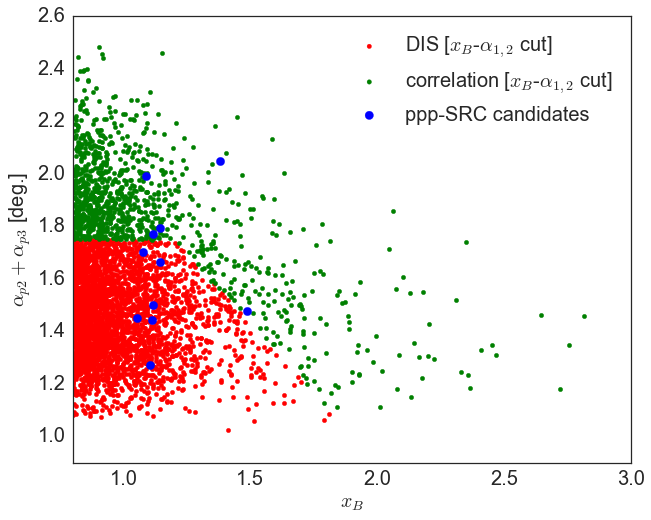

In [12]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppnothing_DIS['Xb'],
            ppnothing_DIS['alpha[0]']+ppnothing_DIS['alpha[1]'] ,
            label = 'DIS [$x_B$-$\\alpha_{1,2}$ cut]',
            color = 'red')  
plt.scatter( ppnothing_Correlation['Xb'],
            ppnothing_Correlation['alpha[0]']+ppnothing_Correlation['alpha[1]'] ,
            label = 'correlation [$x_B$-$\\alpha_{1,2}$ cut]',
            color = 'green')  
plt.scatter( ppp_src['Xb'],
            ppp_src['alpha[1]']+ppp_src['alpha[2]'],
            color = 'blue',
            label = 'ppp-SRC candidates',
            s=70) 
pt.set_axes(ax , '$x_B$' , '$\\alpha_{p2}+\\alpha_{p3}$ [deg.]')
plt.legend(fontsize=20)
ax.set_xlim(0.8,3.0)
ax.set_ylim(0.9,2.6)
fig.savefig('/Users/erezcohen/Desktop/ppp_and_ppnothing_xB_alpha_12.pdf')

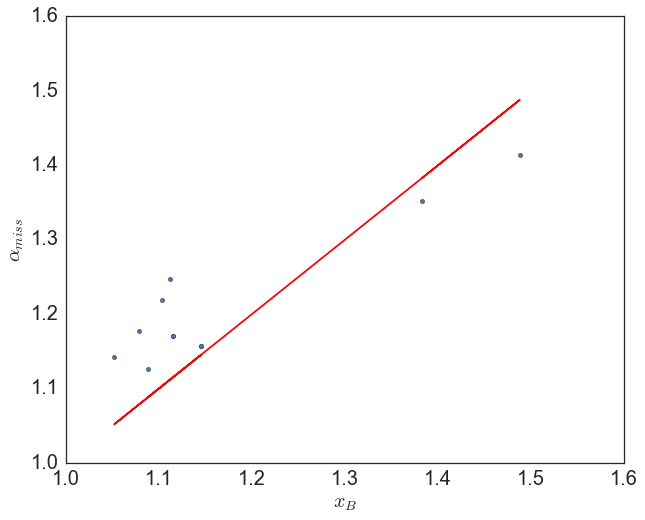

In [17]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src['Xb'],
            ppp_src['alpha[0]']-ppp_src['alpha_q'])  
pt.set_axes(ax , '$x_B$' , '$\\alpha_{miss}$')
plt.legend(fontsize=20)
plt.plot(ppp_src['Xb'],ppp_src['Xb'],color='red')
fig.savefig('/Users/erezcohen/Desktop/ppp_and_ppnothing_xB_alpha_12.pdf')

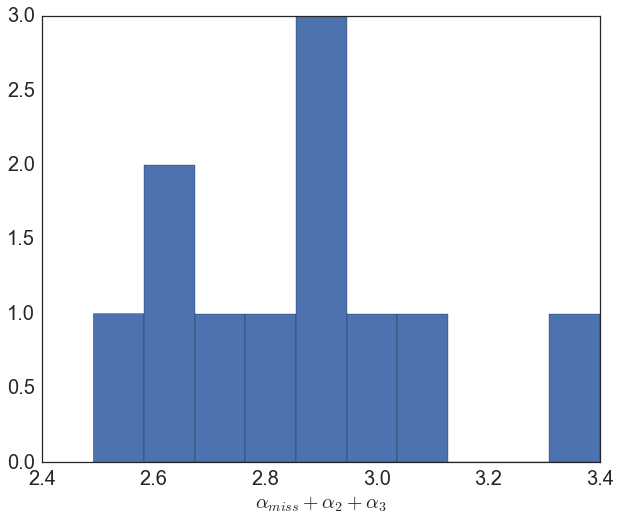

In [16]:
fig , ax = plt.subplots(figsize = [10,8])
plt.hist( ppp_src['alpha[0]']-ppp_src['alpha_q']+ppp_src['alpha[1]']+ppp_src['alpha[2]'] )
pt.set_axes(ax , '$\\alpha_{miss} + \\alpha_{2} + \\alpha_{3}$' , '')

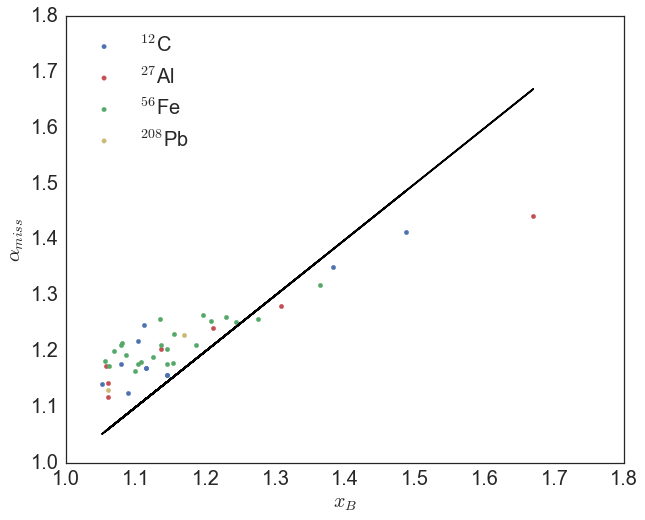

In [25]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src_c12['Xb'], ppp_src_c12['alpha[0]']-ppp_src_c12['alpha_q'] , color='b', label='$^{12}$C')  
plt.scatter( ppp_src_al27['Xb'], ppp_src_al27['alpha[0]']-ppp_src_al27['alpha_q'] , color='r' , label='$^{27}$Al')  
plt.scatter( ppp_src_fe56['Xb'], ppp_src_fe56['alpha[0]']-ppp_src_fe56['alpha_q'] , color='g' , label='$^{56}$Fe')  
plt.scatter( ppp_src_pb208['Xb'], ppp_src_pb208['alpha[0]']-ppp_src_pb208['alpha_q'] , color='y' , label='$^{208}$Pb')  

pt.set_axes(ax , '$x_B$' , '$\\alpha_{miss}$')
plt.legend(fontsize=20,loc='upper left')
plt.plot(ppp_src_alltargets['Xb'],ppp_src_alltargets['Xb'],color='black')

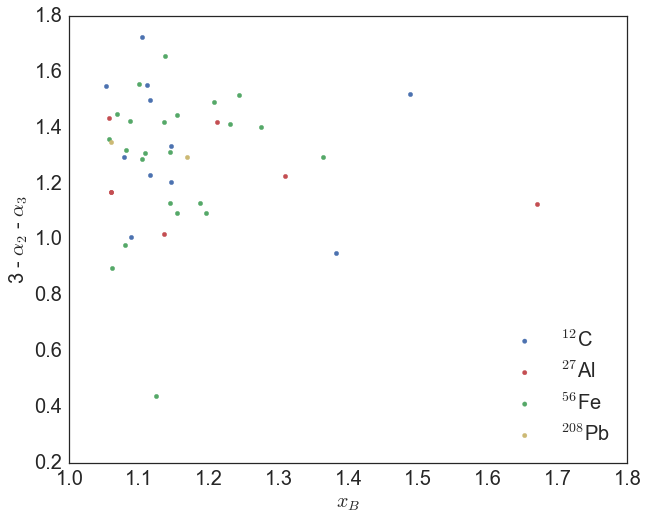

In [36]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src_c12['Xb'], 3 - ppp_src_c12['alpha[1]'] - ppp_src_c12['alpha[2]'] , color='b', label='$^{12}$C')  
plt.scatter( ppp_src_al27['Xb'], 3 - ppp_src_al27['alpha[1]']-ppp_src_al27['alpha[2]'] , color='r' , label='$^{27}$Al')  
plt.scatter( ppp_src_fe56['Xb'], 3 - ppp_src_fe56['alpha[1]']-ppp_src_fe56['alpha[2]'] , color='g' , label='$^{56}$Fe')  
plt.scatter( ppp_src_pb208['Xb'],3 -  ppp_src_pb208['alpha[1]']-ppp_src_pb208['alpha[2]'] , color='y' , label='$^{208}$Pb')  

pt.set_axes(ax , '$x_B$' , '3 - $\\alpha_{2}$ - $\\alpha_{3}$')
plt.legend(fontsize=20,loc='lower right')
# plt.plot(ppp_src_alltargets['Xb'],ppp_src_alltargets['Xb'],color='black')

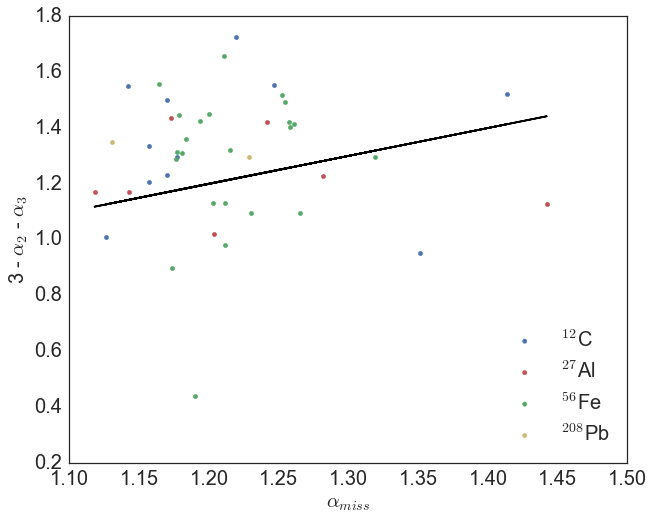

In [38]:
fig , ax = plt.subplots(figsize = [10,8])
plt.scatter( ppp_src_c12['alpha[0]']-ppp_src_c12['alpha_q'], 3 - ppp_src_c12['alpha[1]'] - ppp_src_c12['alpha[2]'] , color='b', label='$^{12}$C')  
plt.scatter( ppp_src_al27['alpha[0]']-ppp_src_al27['alpha_q'], 3 - ppp_src_al27['alpha[1]']-ppp_src_al27['alpha[2]'] , color='r' , label='$^{27}$Al')  
plt.scatter( ppp_src_fe56['alpha[0]']-ppp_src_fe56['alpha_q'], 3 - ppp_src_fe56['alpha[1]']-ppp_src_fe56['alpha[2]'] , color='g' , label='$^{56}$Fe')  
plt.scatter( ppp_src_pb208['alpha[0]']-ppp_src_pb208['alpha_q'],3 -  ppp_src_pb208['alpha[1]']-ppp_src_pb208['alpha[2]'] , color='y' , label='$^{208}$Pb')  
pt.set_axes(ax , '$\\alpha_{miss}$' , '3 - $\\alpha_{2}$ - $\\alpha_{3}$')

plt.plot(ppp_src_alltargets['alpha[0]']-ppp_src_alltargets['alpha_q'],ppp_src_alltargets['alpha[0]']-ppp_src_alltargets['alpha_q'],color='black')
plt.legend(fontsize=20,loc='lower right')